   Unnamed: 0  Order ID               Product  Quantity_Ordered  Price_Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

         Order Date                        Purchase Address  Month    Sales  \
0   12/30/2019 0:01  136 Church St, New York City, NY 10001     12  1700.00   
1   12/29/2019 7:03     562 2nd St, New York City, NY 10001     12   600.00   
2  12/12/2019 18:21    277 Main St, New York City, NY 10001     12    11.95   
3  12/22/2019 15:13     410 6th St, San Francisco, CA 94016     12   149.99   
4  12/18/2019 12:38           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  Hour  
0   New York City     0 

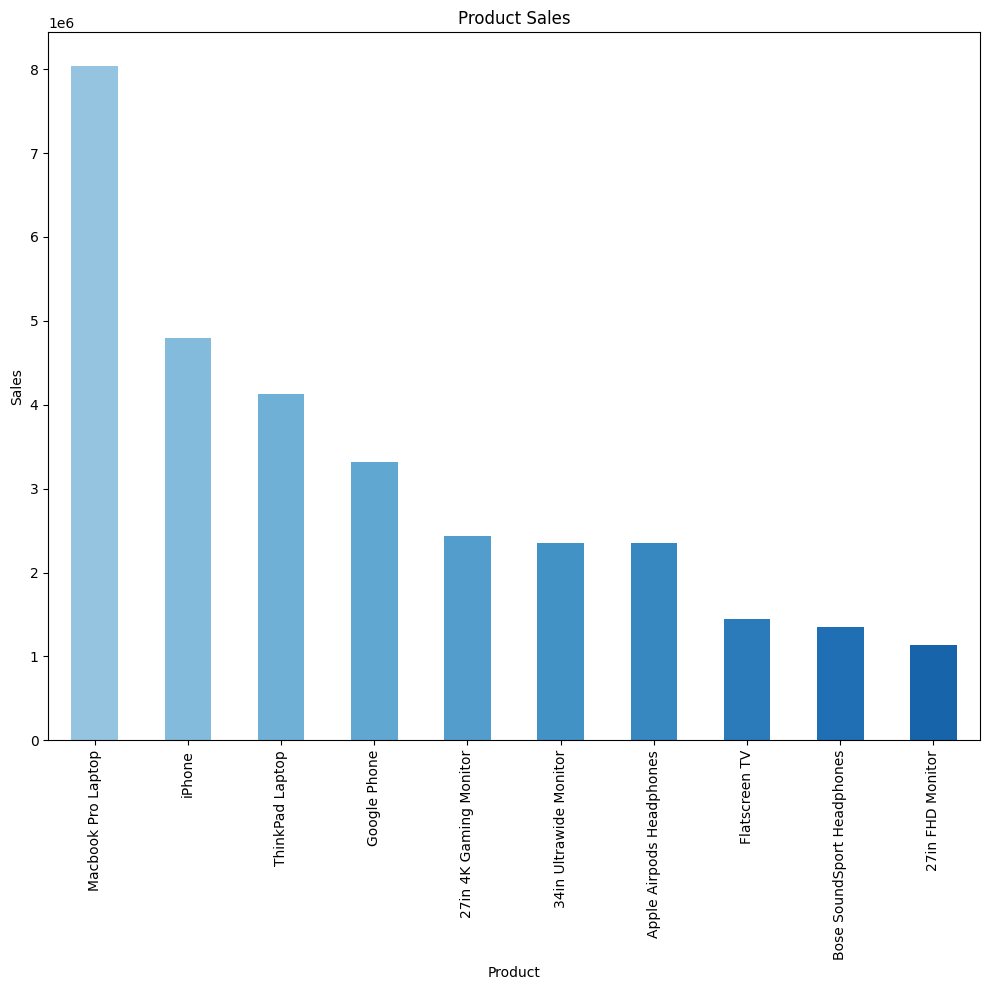

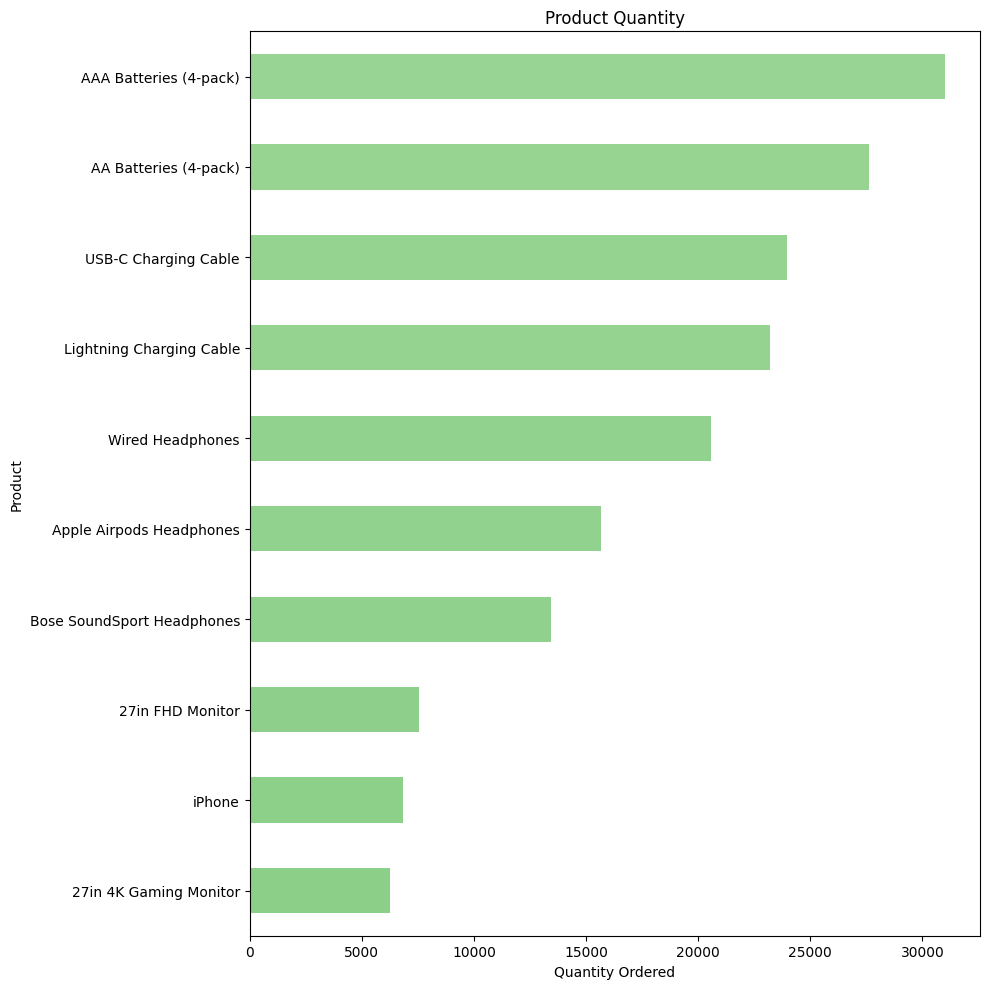

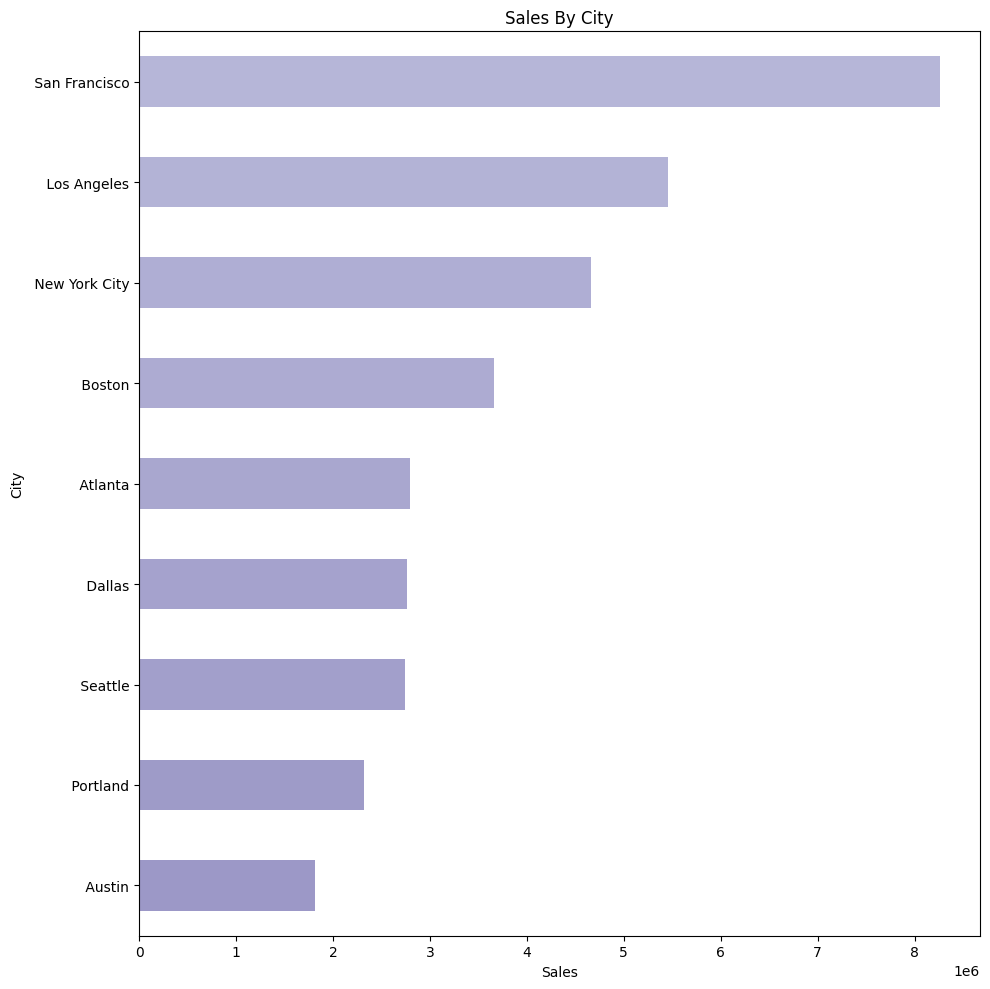

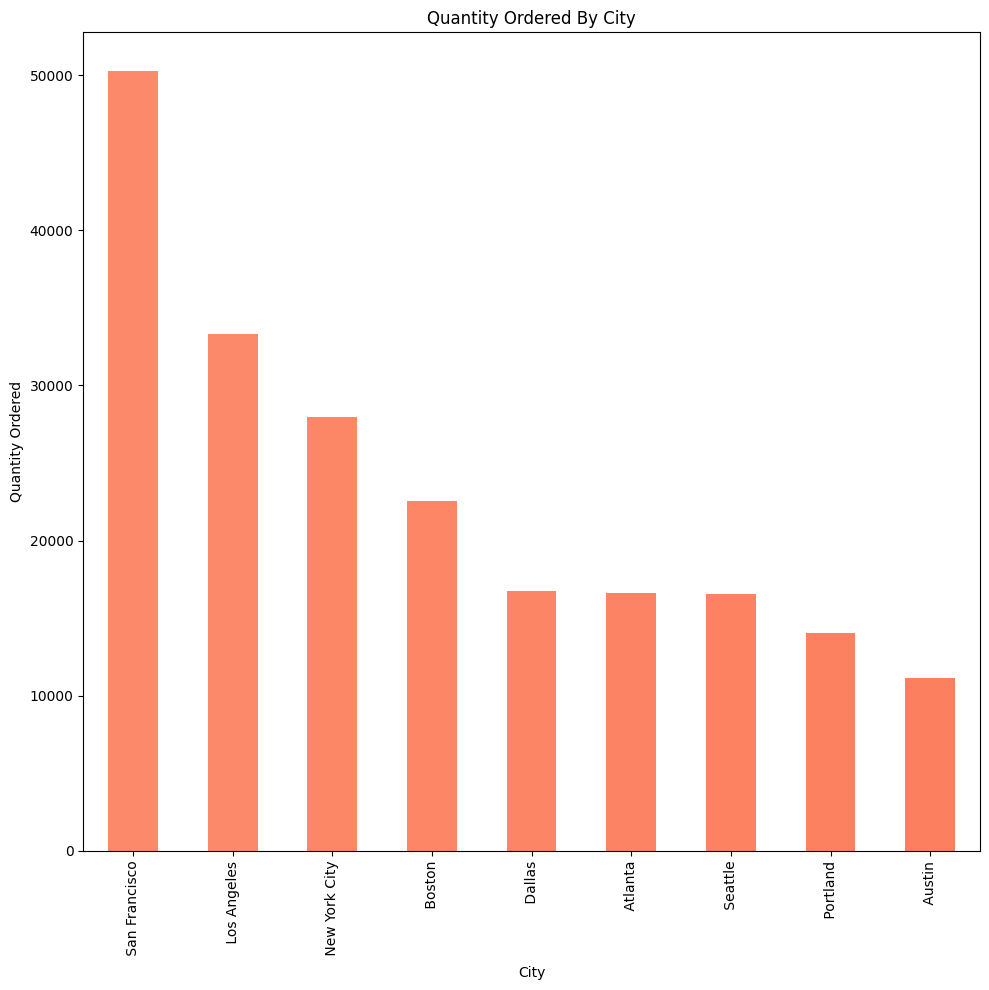

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df=pd.read_csv(r"C:\Users\leand\OneDrive\Desktop\Personal\analisis de datos\Python\Sales_Data.csv")


print(df.head())
print(df.describe())
print(df.info())
print(df.isnull().sum())


df_clean = df.copy()  # copia todo el DataFrame original

df_clean['Sales'] = df_clean['Sales'].fillna(df_clean['Sales'].mean())
df_clean['Price_Each'] = df_clean['Price_Each'].fillna(df_clean['Price_Each'].mean())


df_clean.to_csv('Sales_Data_clean_new.csv',index=False)



VxP=df_clean.groupby('Product')['Sales'].sum()
VxP_10=df_clean.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)

Color1=plt.cm.Blues(np.linspace(0.4,0.8, 10))
VxP_10.plot(kind='bar', color=Color1,figsize=(10,10))
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Product Sales')
plt.tight_layout()
plt.savefig('Product_Sales.png')
plt.show()


CxP=df_clean.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending=False).head(10)

Color2=plt.cm.Greens(np.linspace(0.4,0.8, 100))
CxP.plot(kind='barh', color=Color2,figsize=(10,10))
plt.ylabel('Product')
plt.xlabel('Quantity Ordered')
plt.title('Product Quantity')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.savefig('Product_Quantity.png')
plt.show()

VxC=df_clean.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

Color3=plt.cm.Purples(np.linspace(0.4,0.8, 30))
VxC.plot(kind='barh', color=Color3,figsize=(10,10))

plt.ylabel('City')
plt.xlabel('Sales')
plt.title('Sales By City')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.savefig('Sales_City.png')
plt.show()

PxC=df_clean.groupby('City')['Quantity_Ordered'].sum().sort_values(ascending=False)

Color4=plt.cm.Reds(np.linspace(0.4, 0.8, 100))

PxC.plot(kind='bar', color=Color4,figsize=(10,10))
plt.xlabel('City')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered By City')
plt.tight_layout()

plt.savefig('Product_City.png')
plt.show()









